<a href="https://colab.research.google.com/github/yogasungkowo/LSTM_MODEL_FINANCE_PREDICTION/blob/main/PROJECT_SKRIPSI_YOGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3096666388.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

✅ Dataset mentah berhasil disimpan sebagai 'AAPL_data_(2022-01-01_to_2024-12-31).csv'
✅ Dataset yang sudah dinormalisasi berhasil disimpan sebagai 'AAPL_data_normalized_(2022-01-01_to_2024-12-31).csv'

Bentuk X_train: (541, 60, 1)
Bentuk X_test: (91, 60, 1)
Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 0.0500 - val_loss: 0.0099
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0019 - v

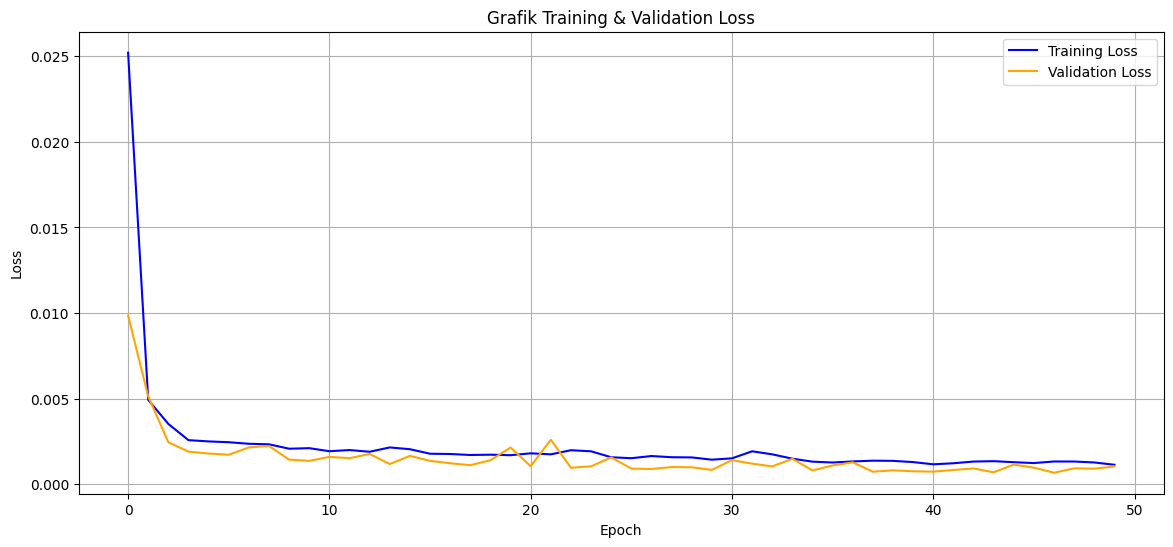

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step


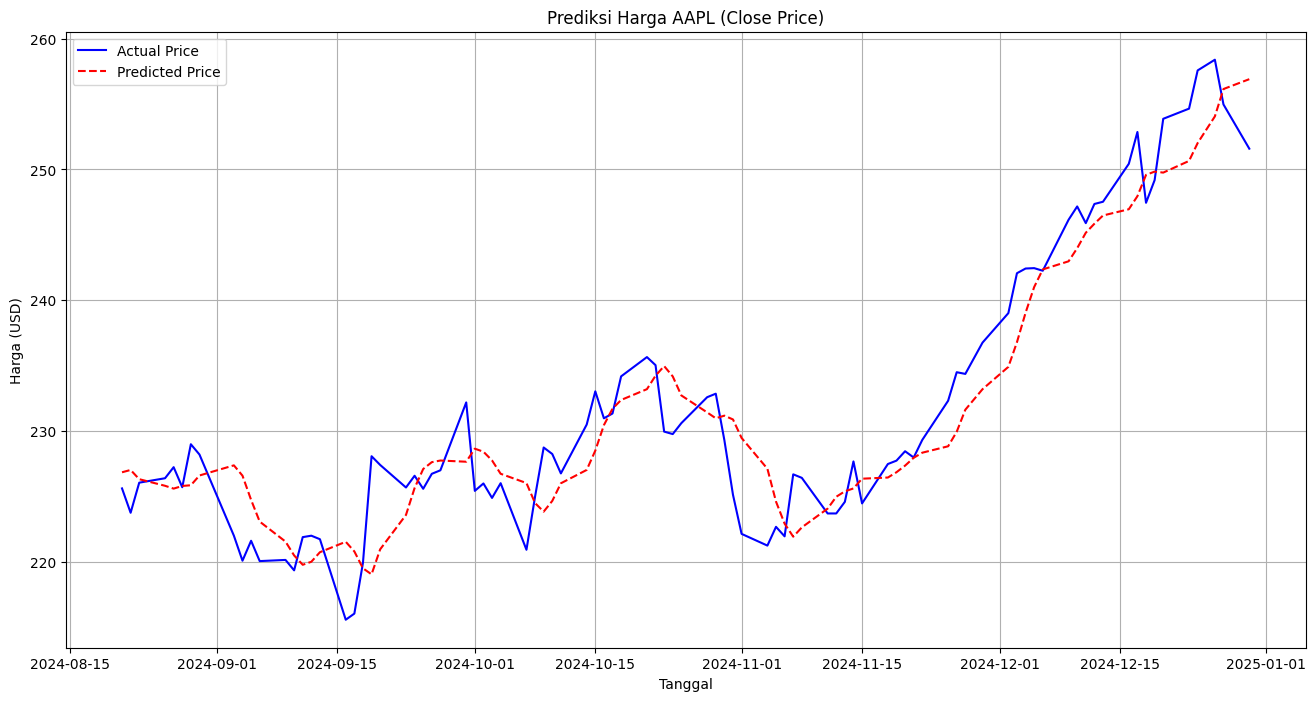


--- KESIMPULAN HASIL EVALUASI MODEL ---
               Metrik Evaluasi Nilai
Root Mean Squared Error (RMSE) $3.31
     Mean Absolute Error (MAE) $2.68

Penjelasan:
RMSE: Kesalahan rata-rata prediksi adalah sekitar $3.31.
MAE: Secara rata-rata, prediksi model meleset sekitar $2.68 dari harga aktual.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

--- KESIMPULAN HASIL PREDIKSI ---
Prediksi harga penutupan untuk hari perdagangan berikutnya adalah: $255.93


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# 1. PERSIAPAN DATA
# ==================================
ticker = 'AAPL'
start_date = '2022-01-01'
# Perpanjang tanggal akhir untuk memastikan data yang cukup untuk 2025
end_date = '2024-12-31'

data = yf.download(ticker, start=start_date, end=end_date)

# PENAMBAHAN 1: Menyimpan dataset mentah
nama_file_raw = f'{ticker}_data_({start_date}_to_{end_date}).csv'
data.to_csv(nama_file_raw)
print(f"✅ Dataset mentah berhasil disimpan sebagai '{nama_file_raw}'")

# Fokus hanya pada kolom 'Close'
df = data[['Close']]

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# PENAMBAHAN 2: Menyimpan dataset yang sudah dinormalisasi
normalized_df = pd.DataFrame(scaled_data, columns=['Close_Normalized'], index=df.index)
nama_file_normalisasi = f'{ticker}_data_normalized_({start_date}_to_{end_date}).csv'
normalized_df.to_csv(nama_file_normalisasi)
print(f"✅ Dataset yang sudah dinormalisasi berhasil disimpan sebagai '{nama_file_normalisasi}'")


# 2. PREPROCESSING UNTUK LSTM
# ==================================
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60

if len(train_data) > time_step and len(test_data) > time_step:
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    print(f"\nBentuk X_train: {X_train.shape}")
    print(f"Bentuk X_test: {X_test.shape}")

    # 3. MEMBANGUN DAN MELATIH MODEL LSTM
    # ==================================
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=1
    )

    # PENAMBAHAN 3: Membuat Grafik Training & Validation Loss
    plt.figure(figsize=(14, 6))
    plt.plot(history.history['loss'], color='blue', label='Training Loss')
    plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
    plt.title('Grafik Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 4. EVALUASI MODEL
    # ==================================
    predictions_scaled = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions_scaled)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(16, 8))
    plot_index = df.index[training_size + time_step:]
    plt.plot(plot_index, y_test_actual, color='blue', label='Actual Price')
    plt.plot(plot_index, predictions, color='red', label='Predicted Price', linestyle='--')
    plt.title('Prediksi Harga AAPL (Close Price)')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 5. KESIMPULAN EVALUASI (RMSE & MAE)
    # =======================================================
    rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
    mae = mean_absolute_error(y_test_actual, predictions)

    results = pd.DataFrame({
        'Metrik Evaluasi': ['Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)'],
        'Nilai': [f"${rmse:,.2f}", f"${mae:,.2f}"]
    })

    print("\n--- KESIMPULAN HASIL EVALUASI MODEL ---")
    print(results.to_string(index=False))
    print(f"\nPenjelasan:")
    print(f"RMSE: Kesalahan rata-rata prediksi adalah sekitar ${rmse:,.2f}.")
    print(f"MAE: Secara rata-rata, prediksi model meleset sekitar ${mae:,.2f} dari harga aktual.")

    # 6. PREDIKSI HARGA SAHAM UNTUK HARI BERIKUTNYA
    # =======================================================
    last_sequence = scaled_data[-time_step:]
    last_sequence = last_sequence.reshape((1, time_step, 1))

    predicted_price_scaled = model.predict(last_sequence)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)

    print("\n--- KESIMPULAN HASIL PREDIKSI ---")
    print(f"Prediksi harga penutupan untuk hari perdagangan berikutnya adalah: ${predicted_price[0][0]:,.2f}")

else:
    print("Data tidak cukup untuk time_step=60. Coba perpanjang rentang tanggal atau kurangi time_step.")